In [1]:
import sys
sys.path.append('/Users/mehdi/github/LSSutils')
import LSSutils.nn.ffnn as ffnn
import LSSutils.nn.nnutils as utils

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

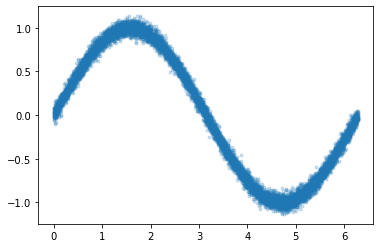

In [4]:
np.random.seed(123456)
x = np.linspace(0, 2.*np.pi, 10000)
np.random.shuffle(x)
y = np.sin(x)+0.05*np.random.normal(size=x.size)
plt.plot(x, y, '.', alpha=0.2)
plt.show()

In [5]:
class data(object):
    def __init__(self, dic):
        self.X = dic['features']
        self.Y = dic['label']

ratio  = 0.8
ntrain = int(ratio * x.size)
nval   = x.size-ntrain

train  = data({'features':x[:ntrain], 'label':y[:ntrain]})
val    = data({'features':x[ntrain:], 'label':y[ntrain:]})

In [6]:
meanX = np.mean(train.X)
stdX  = np.std(train.X)

train.X = (train.X - meanX)/stdX
val.X   = (val.X - meanX)/stdX

In [7]:
model = ffnn.run_model(1, train, val, val, units=[20, 20], batch_size=20)

run with two hidden layer

..................done in 8.4 secs


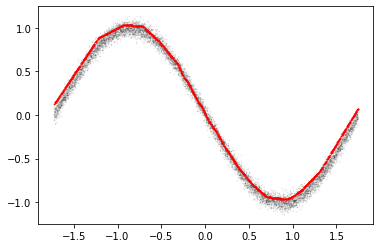

In [8]:
%matplotlib inline
plt.scatter(train.X, train.Y, 1., marker='.', color='k', alpha=0.1)
plt.scatter(val.X, model['Ypred'].flatten(), 1., marker='.', color='r')

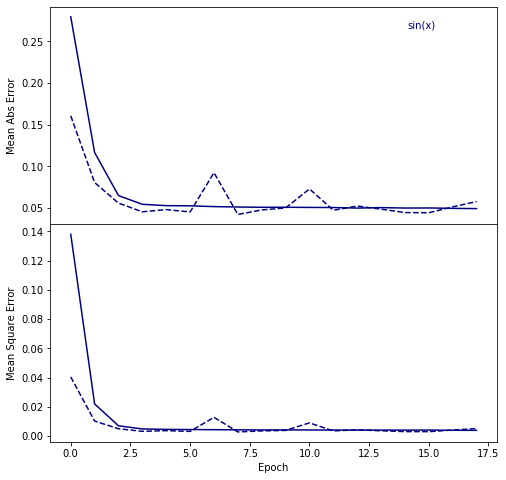

In [9]:
utils.plot_history([model['history']], ['sin(x)'])

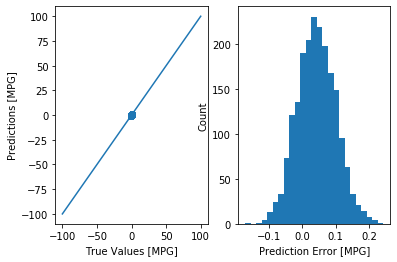

In [11]:
utils.plot_prederr(val.Y, model['Ypred'].flatten())